In [9]:
import numpy as np 
import scipy #intégrer et générer les cdf et pdf de beta 

## Binomial bandit 

In [2]:
#générer les theta 
k = 3
theta = np.random.uniform(0,1,k)

In [3]:
def f(a,theta): 
    return np.random.binomial(1, theta[a])

In [4]:
# case mu_a(theta)=theta_a (binomial bandit)
def I(a,theta): 
    if theta[a]== max(theta): 
        return 1
    return 0

In [16]:
# Python code for computing Equation (11) by quadrature.
def compute_probopt(y, n): 
    k = len(y)
    ans = np.zeros(k)
    for i in k: 
        def fct_to_integrate(x):
            r = scipy.stats.beta.cdf(x, y[i]+1, n[i]-y[i+1])
            for j in k: 
                if i!=j: 
                    r = r * scipy.stats.beta.cdf(x, y[j]+1, n[j]-y[j+1])
            return r
        ans[i] = scipy.integrate.quad(fct_to_integrate, 0, 1)
    return ans                

In [15]:
# Python code for computing Equation (11) by simulation.
# Function to simulate posterior samples
def sim_post(y, n, ndraws):
    k = len(y)
    ans = np.zeros((ndraws, k))
    no = n - np.array(y)
    for i in range(k):
        ans[:, i] = scipy.stats.beta.rvs(y[i] + 1, no[i] + 1, size=ndraws)
    return ans

# Function to calculate the probability of a winner
def prob_winner(post):
    k = post.shape[1]
    w = np.bincount(np.argmax(post, axis=1), minlength=k)
    return w / np.sum(w)

# Function to compute the winning probabilities
def compute_win_prob(y, n, ndraws):
    post = sim_post(y, n, ndraws)
    return prob_winner(post)

[37143.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
[1000000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]
[37489.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
[1000000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]
[37776.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
[1000000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]
[37148.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
[1000000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]
[37353.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
[1000000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]
[37332.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
[1000000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]
[37404.   

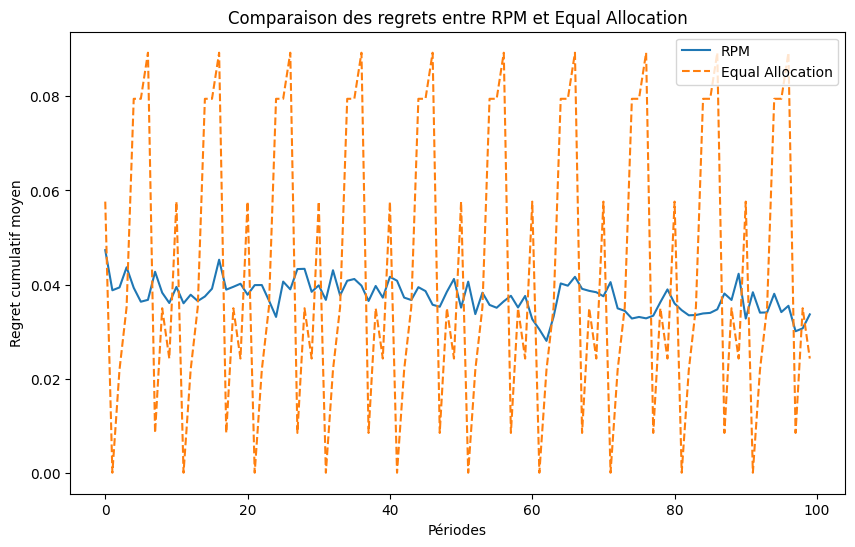

In [37]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
# Paramètres du problème
np.random.seed(42)
n_arms = 10
n_trials = 100
n_experiments = 100
  # Nombre de tirages pour estimer les probabilités d'optimalité

# Générer les vraies probabilités de succès
true_success_probs = np.random.uniform(0, 1/10, n_arms)

def run_experiment(strategy="rpm"):
    """Simule une expérience avec RPM ou Equal Allocation."""
    y = np.zeros(n_arms)  # Succès observés pour chaque bras
    n = np.zeros(n_arms)  # Nombre total de tirages pour chaque bras
    
    champion_index = 0
    for t in range(1, 10**6+1):
        reward = np.random.rand() < true_success_probs[champion_index]
        # Mettre à jour les compteurs
        y[champion_index] += reward
        n[champion_index] += 1
    print(y)
    print(n)

    ndraws = np.random.poisson(1000)
    regrets = []
    cumulative_rewards = []
    
    for t in range(1, n_trials + 1):
        if strategy == "rpm":
            # Calculer les probabilités d'optimalité
            win_probs = compute_win_prob(y, n, ndraws)
            if max(win_probs)>0.95: 
                break
            chosen_arm = np.random.choice(range(n_arms), p=win_probs)
        elif strategy == "equal":
            # Sélectionner les bras de manière cyclique
            chosen_arm = (t - 1) % n_arms
        else:
            raise ValueError("Stratégie non supportée")
        
        # Simuler une récompense
        reward = np.random.rand() < true_success_probs[chosen_arm]
        
        # Mettre à jour les compteurs
        y[chosen_arm] += reward
        n[chosen_arm] += 1
        
        # Calculer le regret
        optimal_reward = max(true_success_probs)
        regrets.append(optimal_reward - true_success_probs[chosen_arm])
        
        # Récompenses cumulées
        cumulative_rewards.append(np.sum(y))

    
    return cumulative_rewards, regrets, y, n

# Simulation pour RPM et Equal Allocation
rpm_cumulative_rewards = []
equal_cumulative_rewards = []
rpm_regrets = []
equal_regrets = []

for _ in range(n_experiments):
    rpm_rewards, rpm_regret, _, _ = run_experiment("rpm")
    equal_rewards, equal_regret, _, _ = run_experiment("equal")
    rpm_cumulative_rewards.append(rpm_rewards)
    equal_cumulative_rewards.append(equal_rewards)
    rpm_regrets.append(rpm_regret)
    equal_regrets.append(equal_regret)

# Calculer les regrets moyens
mean_rpm_regret = np.mean(rpm_regrets, axis=0)
mean_equal_regret = np.mean(equal_regrets, axis=0)

# Graphique : Regret Cumulé
plt.figure(figsize=(10, 6))
plt.plot(mean_rpm_regret, label="RPM")
plt.plot(mean_equal_regret, label="Equal Allocation", linestyle="--")
plt.xlabel("Périodes")
plt.ylabel("Regret cumulatif moyen")
plt.title("Comparaison des regrets entre RPM et Equal Allocation")
plt.legend()
plt.show()



In [30]:
rpm_all_regrets

[([np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),
   np.float64(0.0),


In [29]:
# Calculer les regrets moyens
mean_rpm_regret = np.mean(rpm_all_regrets, axis=0)
mean_equal_regret = np.mean(rpm_all_regrets, axis=0)

# Graphique : Regret Cumulé
plt.figure(figsize=(10, 6))
plt.plot(mean_rpm_regret, label="RPM")
plt.plot(mean_equal_regret, label="Equal Allocation", linestyle="--")
plt.xlabel("Périodes")
plt.ylabel("Regret cumulatif moyen")
plt.title("Comparaison des regrets entre RPM et Equal Allocation")
plt.legend()
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (100, 4) + inhomogeneous part.

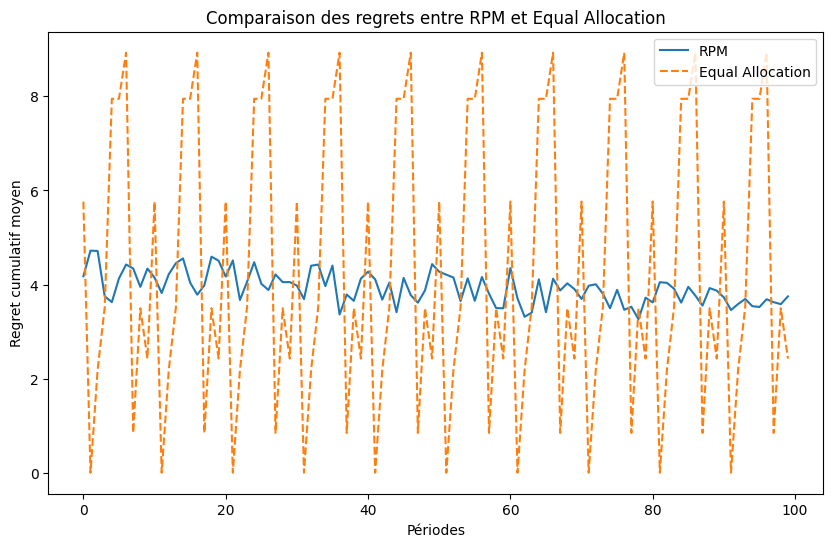

In [34]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
# Paramètres du problème
np.random.seed(42)
n_arms = 10
n_trials = 100
n_experiments = 100
  # Nombre de tirages pour estimer les probabilités d'optimalité

# Générer les vraies probabilités de succès
true_success_probs = np.random.uniform(0, 1/10, n_arms)

def run_experiment(strategy="rpm"):
    """Simule une expérience avec RPM ou Equal Allocation."""
    y = np.zeros(n_arms)  # Succès observés pour chaque bras
    n = np.zeros(n_arms)  # Nombre total de tirages pour chaque bras
    ndraws = np.random.poisson(1000)
    regrets = []
    cumulative_rewards = []
    
    for t in range(1, n_trials + 1):
        if strategy == "rpm":
            # Calculer les probabilités d'optimalité
            win_probs = compute_win_prob(y, n, ndraws)
            chosen_arm = np.random.choice(range(n_arms), p=win_probs)
        elif strategy == "equal":
            # Sélectionner les bras de manière cyclique
            chosen_arm = (t - 1) % n_arms
        else:
            raise ValueError("Stratégie non supportée")
        
        # Simuler une récompense
        reward = np.random.rand() < true_success_probs[chosen_arm]
        
        # Mettre à jour les compteurs
        y[chosen_arm] += reward
        n[chosen_arm] += 1
        
        # Calculer le regret
        optimal_reward = max(true_success_probs)
        regrets.append(optimal_reward - true_success_probs[chosen_arm])
        
        # Récompenses cumulées
        cumulative_rewards.append(np.sum(y))
    
    return cumulative_rewards, regrets, y, n

# Simulation pour RPM et Equal Allocation
rpm_cumulative_rewards = []
equal_cumulative_rewards = []
rpm_regrets = []
equal_regrets = []

for _ in range(n_experiments):
    rpm_rewards, rpm_regret, _, _ = run_experiment("rpm")
    equal_rewards, equal_regret, _, _ = run_experiment("equal")
    rpm_cumulative_rewards.append(rpm_rewards)
    equal_cumulative_rewards.append(equal_rewards)
    rpm_regrets.append(rpm_regret)
    equal_regrets.append(equal_regret)

# Calculer les regrets moyens
mean_rpm_regret = np.sum(rpm_regrets, axis=0)
mean_equal_regret = np.sum(equal_regrets, axis=0)

# Graphique : Regret Cumulé
plt.figure(figsize=(10, 6))
plt.plot(mean_rpm_regret, label="RPM")
plt.plot(mean_equal_regret, label="Equal Allocation", linestyle="--")
plt.xlabel("Périodes")
plt.ylabel("Regret cumulatif moyen")
plt.title("Comparaison des regrets entre RPM et Equal Allocation")
plt.legend()
plt.show()

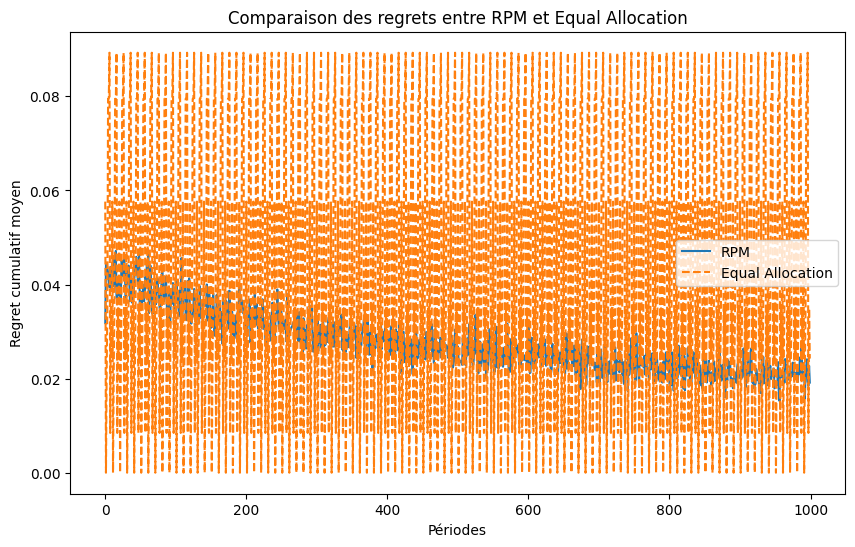

In [32]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
# Paramètres du problème
np.random.seed(42)
n_arms = 10
n_trials = 1000
n_experiments = 100
  # Nombre de tirages pour estimer les probabilités d'optimalité

# Générer les vraies probabilités de succès
true_success_probs = np.random.uniform(0, 1/10, n_arms)

def run_experiment(strategy="rpm"):
    """Simule une expérience avec RPM ou Equal Allocation."""
    y = np.zeros(n_arms)  # Succès observés pour chaque bras
    n = np.zeros(n_arms)  # Nombre total de tirages pour chaque bras
    ndraws = np.random.poisson(1000)
    regrets = []
    cumulative_rewards = []
    
    for t in range(1, n_trials + 1):
        if strategy == "rpm":
            # Calculer les probabilités d'optimalité
            win_probs = compute_win_prob(y, n, ndraws)
            chosen_arm = np.random.choice(range(n_arms), p=win_probs)
        elif strategy == "equal":
            # Sélectionner les bras de manière cyclique
            chosen_arm = (t - 1) % n_arms
        else:
            raise ValueError("Stratégie non supportée")
        
        # Simuler une récompense
        reward = np.random.rand() < true_success_probs[chosen_arm]
        
        # Mettre à jour les compteurs
        y[chosen_arm] += reward
        n[chosen_arm] += 1
        
        # Calculer le regret
        optimal_reward = max(true_success_probs)
        regrets.append(optimal_reward - true_success_probs[chosen_arm])
        
        # Récompenses cumulées
        cumulative_rewards.append(np.sum(y))
    
    return cumulative_rewards, regrets, y, n

# Simulation pour RPM et Equal Allocation
rpm_cumulative_rewards = []
equal_cumulative_rewards = []
rpm_regrets = []
equal_regrets = []

for _ in range(n_experiments):
    rpm_rewards, rpm_regret, _, _ = run_experiment("rpm")
    equal_rewards, equal_regret, _, _ = run_experiment("equal")
    rpm_cumulative_rewards.append(rpm_rewards)
    equal_cumulative_rewards.append(equal_rewards)
    rpm_regrets.append(rpm_regret)
    equal_regrets.append(equal_regret)

# Calculer les regrets moyens
mean_rpm_regret = np.mean(rpm_regrets, axis=0)
mean_equal_regret = np.mean(equal_regrets, axis=0)

# Graphique : Regret Cumulé
plt.figure(figsize=(10, 6))
plt.plot(mean_rpm_regret, label="RPM")
plt.plot(mean_equal_regret, label="Equal Allocation", linestyle="--")
plt.xlabel("Périodes")
plt.ylabel("Regret cumulatif moyen")
plt.title("Comparaison des regrets entre RPM et Equal Allocation")
plt.legend()
plt.show()



In [ ]:
# Visualisation des distributions postérieures après une expérience RPM
_, _, final_y, final_n = run_experiment("rpm")
post_samples = sim_post(final_y, final_n, 1000)
x = np.linspace(0, 0.1, 100)

plt.figure(figsize=(12, 8))
for arm in range(n_arms):
    plt.plot(x, beta.pdf(x, final_y[arm] + 1, final_n[arm] - final_y[arm] + 1), label=f"Bras {arm+1}")
plt.xlabel("Probabilité de succès")
plt.ylabel("Densité")
plt.title("Distribution postérieure après l'expérience (RPM)")
plt.legend()
plt.show()

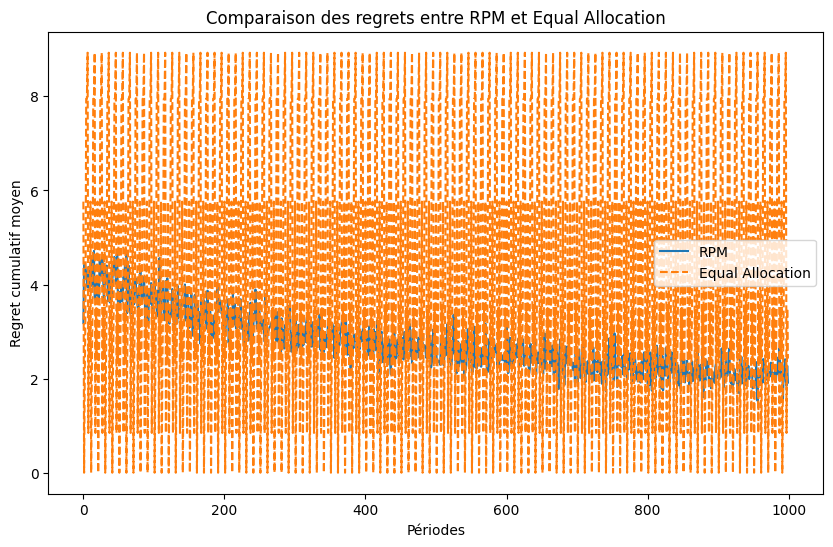

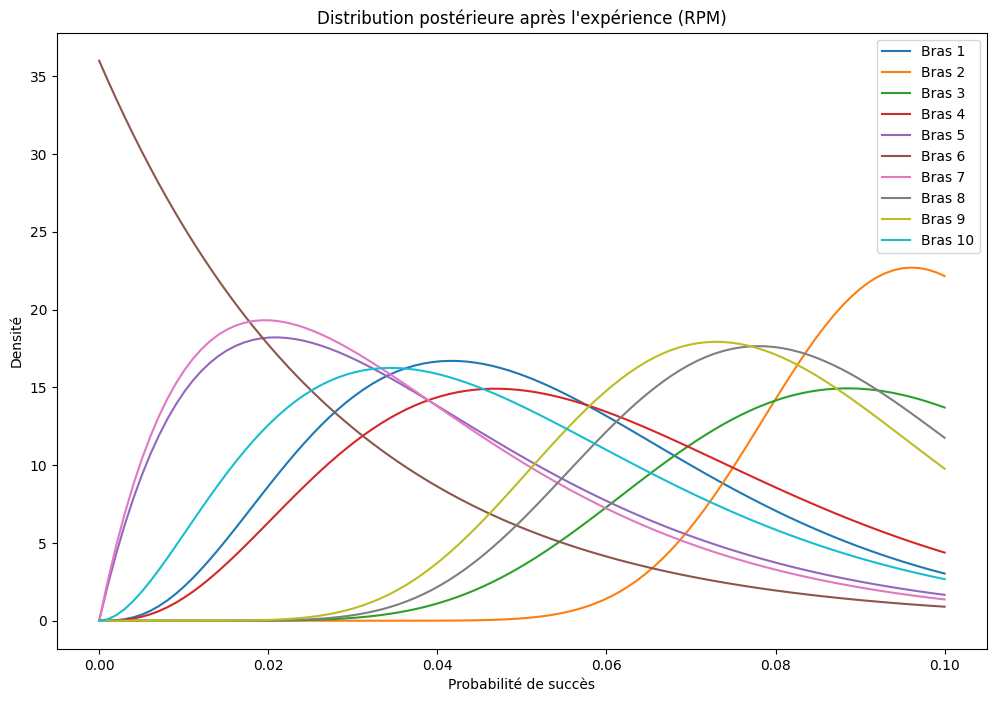

In [24]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
# Paramètres du problème
np.random.seed(42)
n_arms = 10
n_trials = 1000
n_experiments = 100
  # Nombre de tirages pour estimer les probabilités d'optimalité

# Générer les vraies probabilités de succès
true_success_probs = np.random.uniform(0, 1/10, n_arms)

def run_experiment(strategy="rpm"):
    """Simule une expérience avec RPM ou Equal Allocation."""
    y = np.zeros(n_arms)  # Succès observés pour chaque bras
    n = np.zeros(n_arms)  # Nombre total de tirages pour chaque bras
    ndraws = np.random.poisson(1000)
    regrets = []
    cumulative_rewards = []
    
    for t in range(1, n_trials + 1):
        if strategy == "rpm":
            # Calculer les probabilités d'optimalité
            win_probs = compute_win_prob(y, n, ndraws)
            chosen_arm = np.random.choice(range(n_arms), p=win_probs)
        elif strategy == "equal":
            # Sélectionner les bras de manière cyclique
            chosen_arm = (t - 1) % n_arms
        else:
            raise ValueError("Stratégie non supportée")
        
        # Simuler une récompense
        reward = np.random.rand() < true_success_probs[chosen_arm]
        
        # Mettre à jour les compteurs
        y[chosen_arm] += reward
        n[chosen_arm] += 1
        
        # Calculer le regret
        optimal_reward = max(true_success_probs)
        regrets.append(optimal_reward - true_success_probs[chosen_arm])
        
        # Récompenses cumulées
        cumulative_rewards.append(np.sum(y))
    
    return cumulative_rewards, regrets, y, n

# Simulation pour RPM et Equal Allocation
rpm_cumulative_rewards = []
equal_cumulative_rewards = []
rpm_regrets = []
equal_regrets = []

for _ in range(n_experiments):
    rpm_rewards, rpm_regret, _, _ = run_experiment("rpm")
    equal_rewards, equal_regret, _, _ = run_experiment("equal")
    rpm_cumulative_rewards.append(rpm_rewards)
    equal_cumulative_rewards.append(equal_rewards)
    rpm_regrets.append(rpm_regret)
    equal_regrets.append(equal_regret)

# Calculer les regrets moyens
mean_rpm_regret = np.sum(rpm_regrets, axis=0)
mean_equal_regret = np.sum(equal_regrets, axis=0)

# Graphique : Regret Cumulé
plt.figure(figsize=(10, 6))
plt.plot(mean_rpm_regret, label="RPM")
plt.plot(mean_equal_regret, label="Equal Allocation", linestyle="--")
plt.xlabel("Périodes")
plt.ylabel("Regret cumulatif moyen")
plt.title("Comparaison des regrets entre RPM et Equal Allocation")
plt.legend()
plt.show()

# Visualisation des distributions postérieures après une expérience RPM
_, _, final_y, final_n = run_experiment("rpm")
post_samples = sim_post(final_y, final_n, 1000)
x = np.linspace(0, 0.1, 100)

plt.figure(figsize=(12, 8))
for arm in range(n_arms):
    plt.plot(x, beta.pdf(x, final_y[arm] + 1, final_n[arm] - final_y[arm] + 1), label=f"Bras {arm+1}")
plt.xlabel("Probabilité de succès")
plt.ylabel("Densité")
plt.title("Distribution postérieure après l'expérience (RPM)")
plt.legend()
plt.show()